# Ejemplo de postproceso, agrupación de resultados obtenidos en las simulaciones del cálculo de costes de reparacion en el grado de desarrollo de proyecto de inversión.

Este ejemplo continuará a partir de los datos obtenidos en cada una de las simulaciones numéricas de las fases de reparación a lo largo de la vida útil del dique.

## Importación de paquetes de IPython

In [1]:
# hidden
import environment as env
env.initialize()

In [2]:
# Python 2/3 setup 
from __future__ import (absolute_import, division, print_function, unicode_literals)
# from builtins import *

In [3]:
# Juypyter setup

%matplotlib inline
import os
import sys
import pickle
import ast
import pandas as pd
import matplotlib.pyplot as plt
env.pandas_setup()
from IPython.display import HTML

In [4]:
sim_path = os.path.join(env.modules_path ,'AP_PI_reparacion_est_conservadora')

if sim_path not in sys.path:
    sys.path.append(sim_path)

## Importación de paquetes para el ejemplo

In [5]:
from posproceso import generar_tablas_costes_estado
from posproceso import coste_total_reparacion
from posproceso import figura_coste_total_reparacion
from posproceso import coste_anual_reparacion
from posproceso import figuras_coste_anual_reparacion


## Datos de entrada

In [6]:
carpeta_resultados = os.path.join('resultados')
estrategias = ['estrategia_conservadora']
n_sim = 25
simulaciones = range(n_sim)

## Generación de tablas de costes de reparación estado a estado

Se genera la tabla con los costes de reparación para cada modo de fallo estado a estado para cada simulación

In [7]:
datos = generar_tablas_costes_estado(estrategias, simulaciones, carpeta_resultados, ruta_de=sim_path)

# Cambio el numero de filas y columnas que se muestran 
env.pandas_setup(10, 10)
datos

tr    ss    mf    0    1  ...    14595  14596  14597  14598  14599
0   T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0
1   T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0
2   T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0
3   T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0
4   T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0
..  ...   ...   ...  ...  ...  ...      ...    ...    ...    ...    ...
20  T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0
21  T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0
22  T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0
23  T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0
24  T_0  SS_0  MF_3  0.0  0.0  ...      0.0    0.0    0.0    0.0    0.0

[25 rows x 14603 columns]

## Generación de tablas de costes de reparación total

Se genera la tabla con los costes totales de reparación para cada modo de fallo para cada simulación a lo largo de la vida útil

In [8]:
datos = coste_total_reparacion(estrategias, carpeta_resultados, ruta_de=sim_path)

# Cambio el numero de filas y columnas que se muestran 
env.pandas_setup(24, 10)
datos

tr   ss    mf  
T_0  SS_0  MF_3     375840.0
           MF_3     207495.0
           MF_3          0.0
           MF_3     598995.0
           MF_3          0.0
           MF_3     853470.0
           MF_3    1331100.0
           MF_3    1017900.0
           MF_3     728190.0
           MF_3     728190.0
           MF_3     751680.0
           MF_3     598995.0
                     ...    
           MF_3          0.0
           MF_3     481545.0
           MF_3     602910.0
           MF_3    1456380.0
           MF_3     732105.0
           MF_3    1381995.0
           MF_3    1225395.0
           MF_3     732105.0
           MF_3     321030.0
           MF_3     610740.0
           MF_3     595080.0
           MF_3     211410.0
Length: 25, dtype: float64

## Boxplot coste total de reparación del modo de fallo en euros a lo largo de la vida útil

Boxplot con la variabilidad del coste total de reparación del modo de fallo en euros a lo largo de la vida útil. La línea azul indica el coste medio en las N simulaciones.

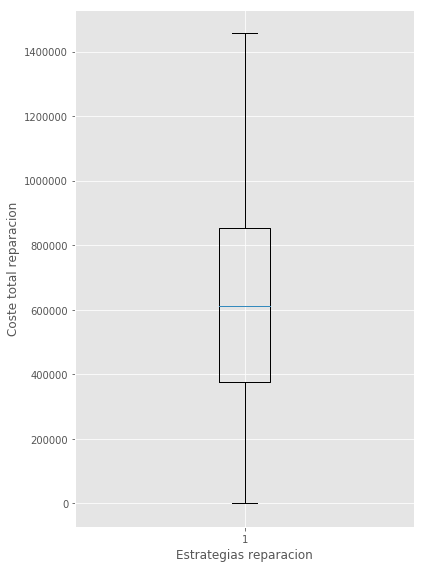

In [9]:
plt.figure(figsize=(6, 8))
figura_coste_total_reparacion(estrategias, carpeta_resultados, ruta_de=sim_path)

## Generación de tablas de costes anuales de reparación

Se genera la tabla con los costes anuales de reparación para cada modo de fallo para cada simulación a lo largo de la vida útil

In [10]:
muestra_coste_anual = coste_anual_reparacion(estrategias, carpeta_resultados, ruta_de=sim_path)

## Generación de figuras de costes medio anual de reparación y coste acumulado año a año de reparación

En las figuras siguientes se muestra el histograma con los costes medios año a año de reparación del modo de fallo y un boxplot con los costes acumulados de simulación a lo largo de la vida útil junto con la variabilidad recogida en las N simulaciones

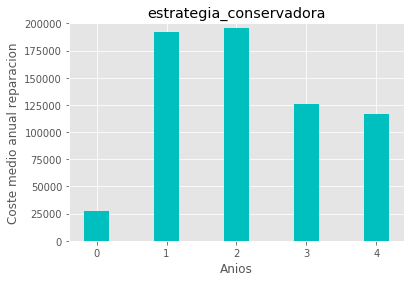

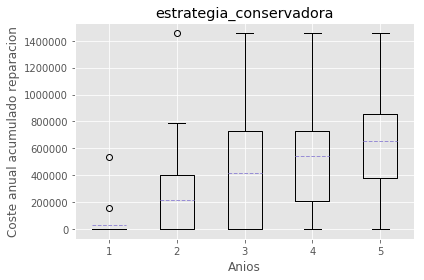

In [11]:
plt.figure(figsize=(10, 15))
figuras_coste_anual_reparacion(estrategias, carpeta_resultados, ruta_de=sim_path)